#Milestone 1: Data Preparation Report

##1. Exploratory Data Analysis (EDA)

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
creditscore = pd.read_csv('train.csv')
# Interpretation: This loads the dataset into a DataFrame for exploration and analysis.

In [3]:
# Check the number of rows and columns
creditscore.shape

# Interpretation: The shape tells us how many rows (samples) and columns (features) are present.

(10157, 28)

In [4]:
# View data types and non-null counts
creditscore.info()

# Interpretation: This displays the data types (e.g., int64, float64, object) and the number of non-null values, helping detect missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10157 non-null  object 
 1   Customer_ID               10157 non-null  object 
 2   Month                     10157 non-null  object 
 3   Name                      9149 non-null   object 
 4   Age                       10157 non-null  object 
 5   SSN                       10157 non-null  object 
 6   Occupation                10157 non-null  object 
 7   Annual_Income             10157 non-null  object 
 8   Monthly_Inhand_Salary     8663 non-null   float64
 9   Num_Bank_Accounts         10157 non-null  int64  
 10  Num_Credit_Card           10157 non-null  int64  
 11  Interest_Rate             10157 non-null  int64  
 12  Num_of_Loan               10157 non-null  object 
 13  Type_of_Loan              8949 non-null   object 
 14  Delay_

In [5]:
# Display column names
creditscore.columns

# Interpretation: This lists the column names, ensuring we know which variables we're working with.

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
# Display the first 5 rows
creditscore.head()

# Interpretation: This gives a preview of the first few rows of the dataset, which helps verify that the data was loaded correctly.

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
# Display the data types
creditscore.dtypes

# Interpretation: Identify the name and type (continuous or categorical) for each variable in the dataset.

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [8]:
# Check the number of unique values in each column
creditscore.nunique()

# Interpretation: Knowing the number of unique values helps us understand the variety in each column, especially categorical variables.

,0
ID,10157
Customer_ID,1270
Month,8
Name,1244
Age,300
SSN,1271
Occupation,16
Annual_Income,1932
Monthly_Inhand_Salary,1333
Num_Bank_Accounts,133


In [9]:
# Descriptive statistics of numerical columns
creditscore.describe()

# Interpretation: Summary statistics for numerical features

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,8663.000000,10157.000000,10157.000000,10157.000000,10157.000000,9946.000000,10157.000000,10157.000000
mean,4320.495020,17.519642,24.792065,74.042926,21.267106,24.661070,32.289234,1388.932935
std,3217.103144,122.161565,140.026611,470.223100,14.588569,176.892261,5.151950,8170.215990
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.172942,0.000000
25%,1684.832083,3.000000,4.000000,7.000000,10.000000,3.000000,27.975990,28.249307
50%,3260.465000,6.000000,5.000000,13.000000,18.000000,5.000000,32.274247,67.220560
75%,6094.433333,8.000000,7.000000,20.000000,28.000000,9.000000,36.518992,163.588847
max,14836.736667,1789.000000,1486.000000,5721.000000,67.000000,2592.000000,50.000000,82204.000000


In [10]:
# Get value counts for the sex column (categorical variable)
creditscore['Credit_Mix'].value_counts()

# Interpretation: This shows how many of each Credit_Mix are in the dataset. It shows there are more standard.

,count
Credit_Mix,
Standard,3633
Good,2541
_,2056
Bad,1927


In [11]:
# Get proportion with counts for the Sex column (categorical variable)
creditscore['Credit_Mix'].value_counts(normalize=True)

# Interpretation: This shows the percentage distribution of each Credit_Mix are in the dataset. It shows there are more standard.

,proportion
Credit_Mix,
Standard,0.357684
Good,0.250172
_,0.202422
Bad,0.189721


In [12]:
# Get value counts for the sex column (categorical variable)
creditscore['Occupation'].value_counts()

# Interpretation: This shows how many of each Occupation are in the dataset. It shows there are more lawer.

,count
Occupation,
Lawyer,747
_______,698
Journalist,698
Entrepreneur,670
Mechanic,670
Teacher,665
Doctor,654
Writer,638
Architect,633


In [13]:
# Get proportion with counts for the Sex column (categorical variable)
creditscore['Occupation'].value_counts(normalize=True)

# Interpretation: This shows the percentage distribution of each Occupation are in the dataset. It shows there are more lawer.

,proportion
Occupation,
Lawyer,0.073545
_______,0.068721
Journalist,0.068721
Entrepreneur,0.065964
Mechanic,0.065964
Teacher,0.065472
Doctor,0.064389
Writer,0.062814
Architect,0.062322


In [14]:
# Get value counts for the sex column (categorical variable)
creditscore['Credit_Score'].value_counts()

# Interpretation: This shows how many of each Credit_Score are in the dataset. It shows there are more standard.

,count
Credit_Score,
Standard,5280
Poor,3001
Good,1875


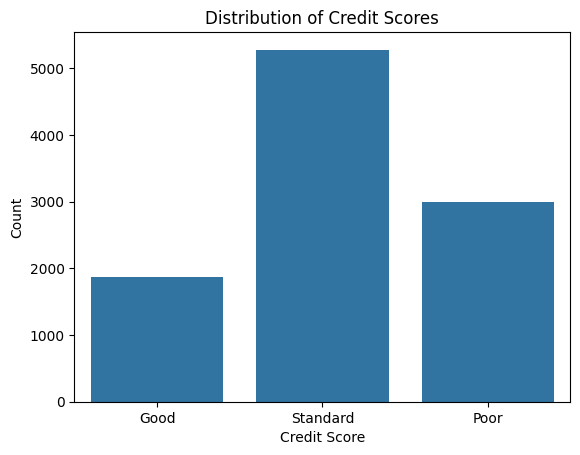

In [15]:
sns.countplot(data=creditscore, x='Credit_Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.show()

# Interpretation: This shows how many of each Credit_Score are in the dataset. It shows there are more standard.

In [16]:
# Get proportion with counts for the Sex column (categorical variable)
creditscore['Credit_Score'].value_counts(normalize=True)

# Interpretation: This shows the percentage distribution of each Credit_Score are in the dataset. It shows there are more standard.

,proportion
Credit_Score,
Standard,0.51989
Poor,0.29549
Good,0.18462


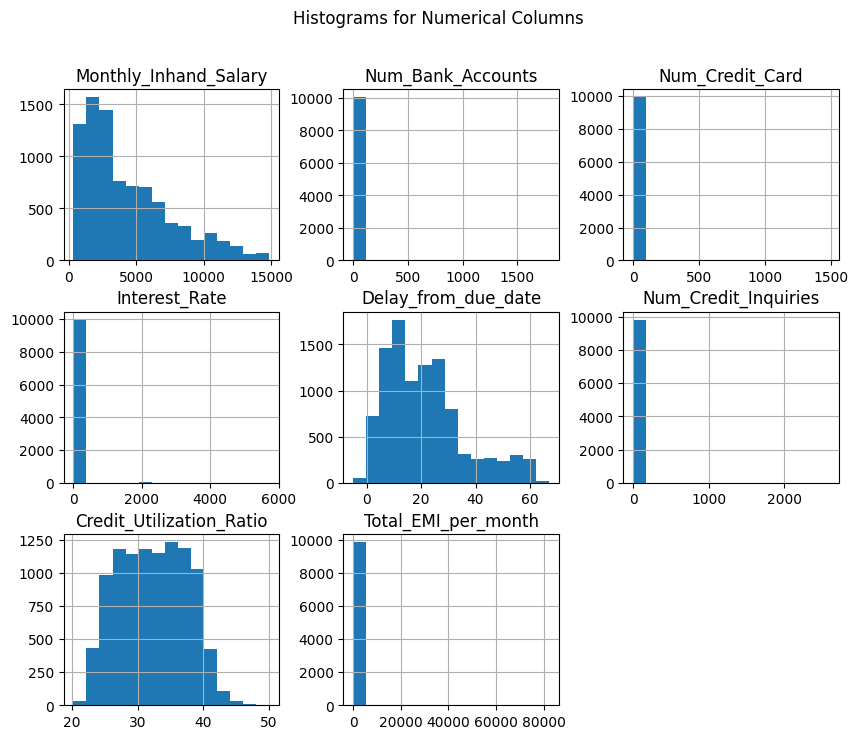

In [17]:
# Plot histograms for all numerical columns
creditscore.hist(bins=15, figsize=(10, 8))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

# Interpretation: Histograms help visualize the distribution of numerical data, and detect skewness or outliers.
# Interpretation: Feature 'Monthly_Inhand_Salary', 'Delay_from_due_date'are right skewness. These features may have outliers.

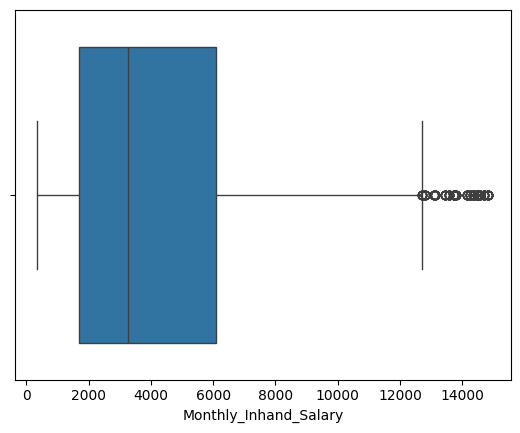

In [18]:
# Boxplot for detecting outliers in Monthly_Inhand_Salary
sns.boxplot(data=creditscore, x='Monthly_Inhand_Salary')
plt.show()

# Interpretation: Boxplots show the spread of the data, including the interquartile range, and help detect outliers. The median Monthly_Inhand_Salary is near the lower end of the Monthly_Inhand_Salary range, suggesting that the majority of Monthly_Inhand_Salary are low. There are some high Monthly_Inhand_Salary are outliers.

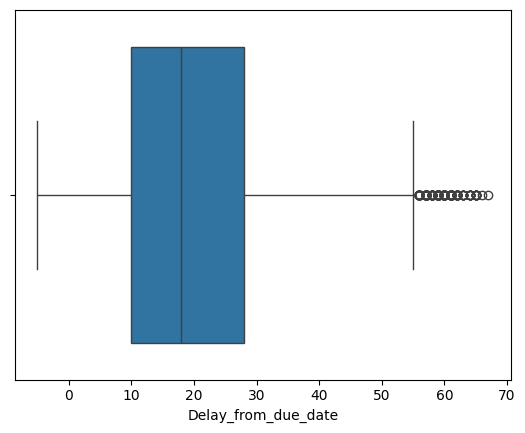

In [19]:
# Boxplot for detecting outliers in Fare
sns.boxplot(data=creditscore, x='Delay_from_due_date')
plt.show()

# Interpretation: The median age is near the 30, suggesting that the majority of ages are 20-40. There are some old passengers are outliers.

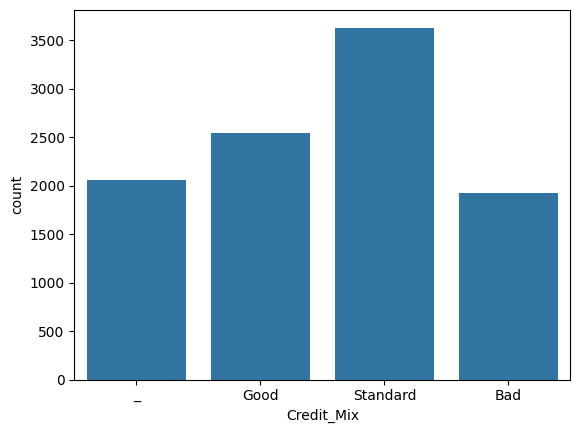

In [20]:
# Bar chart for the Credit_Mix column
sns.countplot(x='Credit_Mix', data=creditscore)
plt.show()

# Interpretation: Bar charts show the frequency of each category in a categorical variable, useful for analyzing class imbalance.

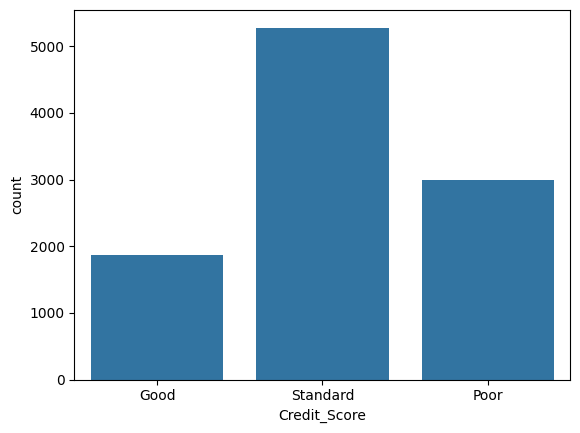

In [21]:
# Bar chart for the Credit_Score column
sns.countplot(x='Credit_Score', data=creditscore)
plt.show()

# Interpretation: Bar charts show the frequency of each category in a categorical variable, useful for analyzing class imbalance.

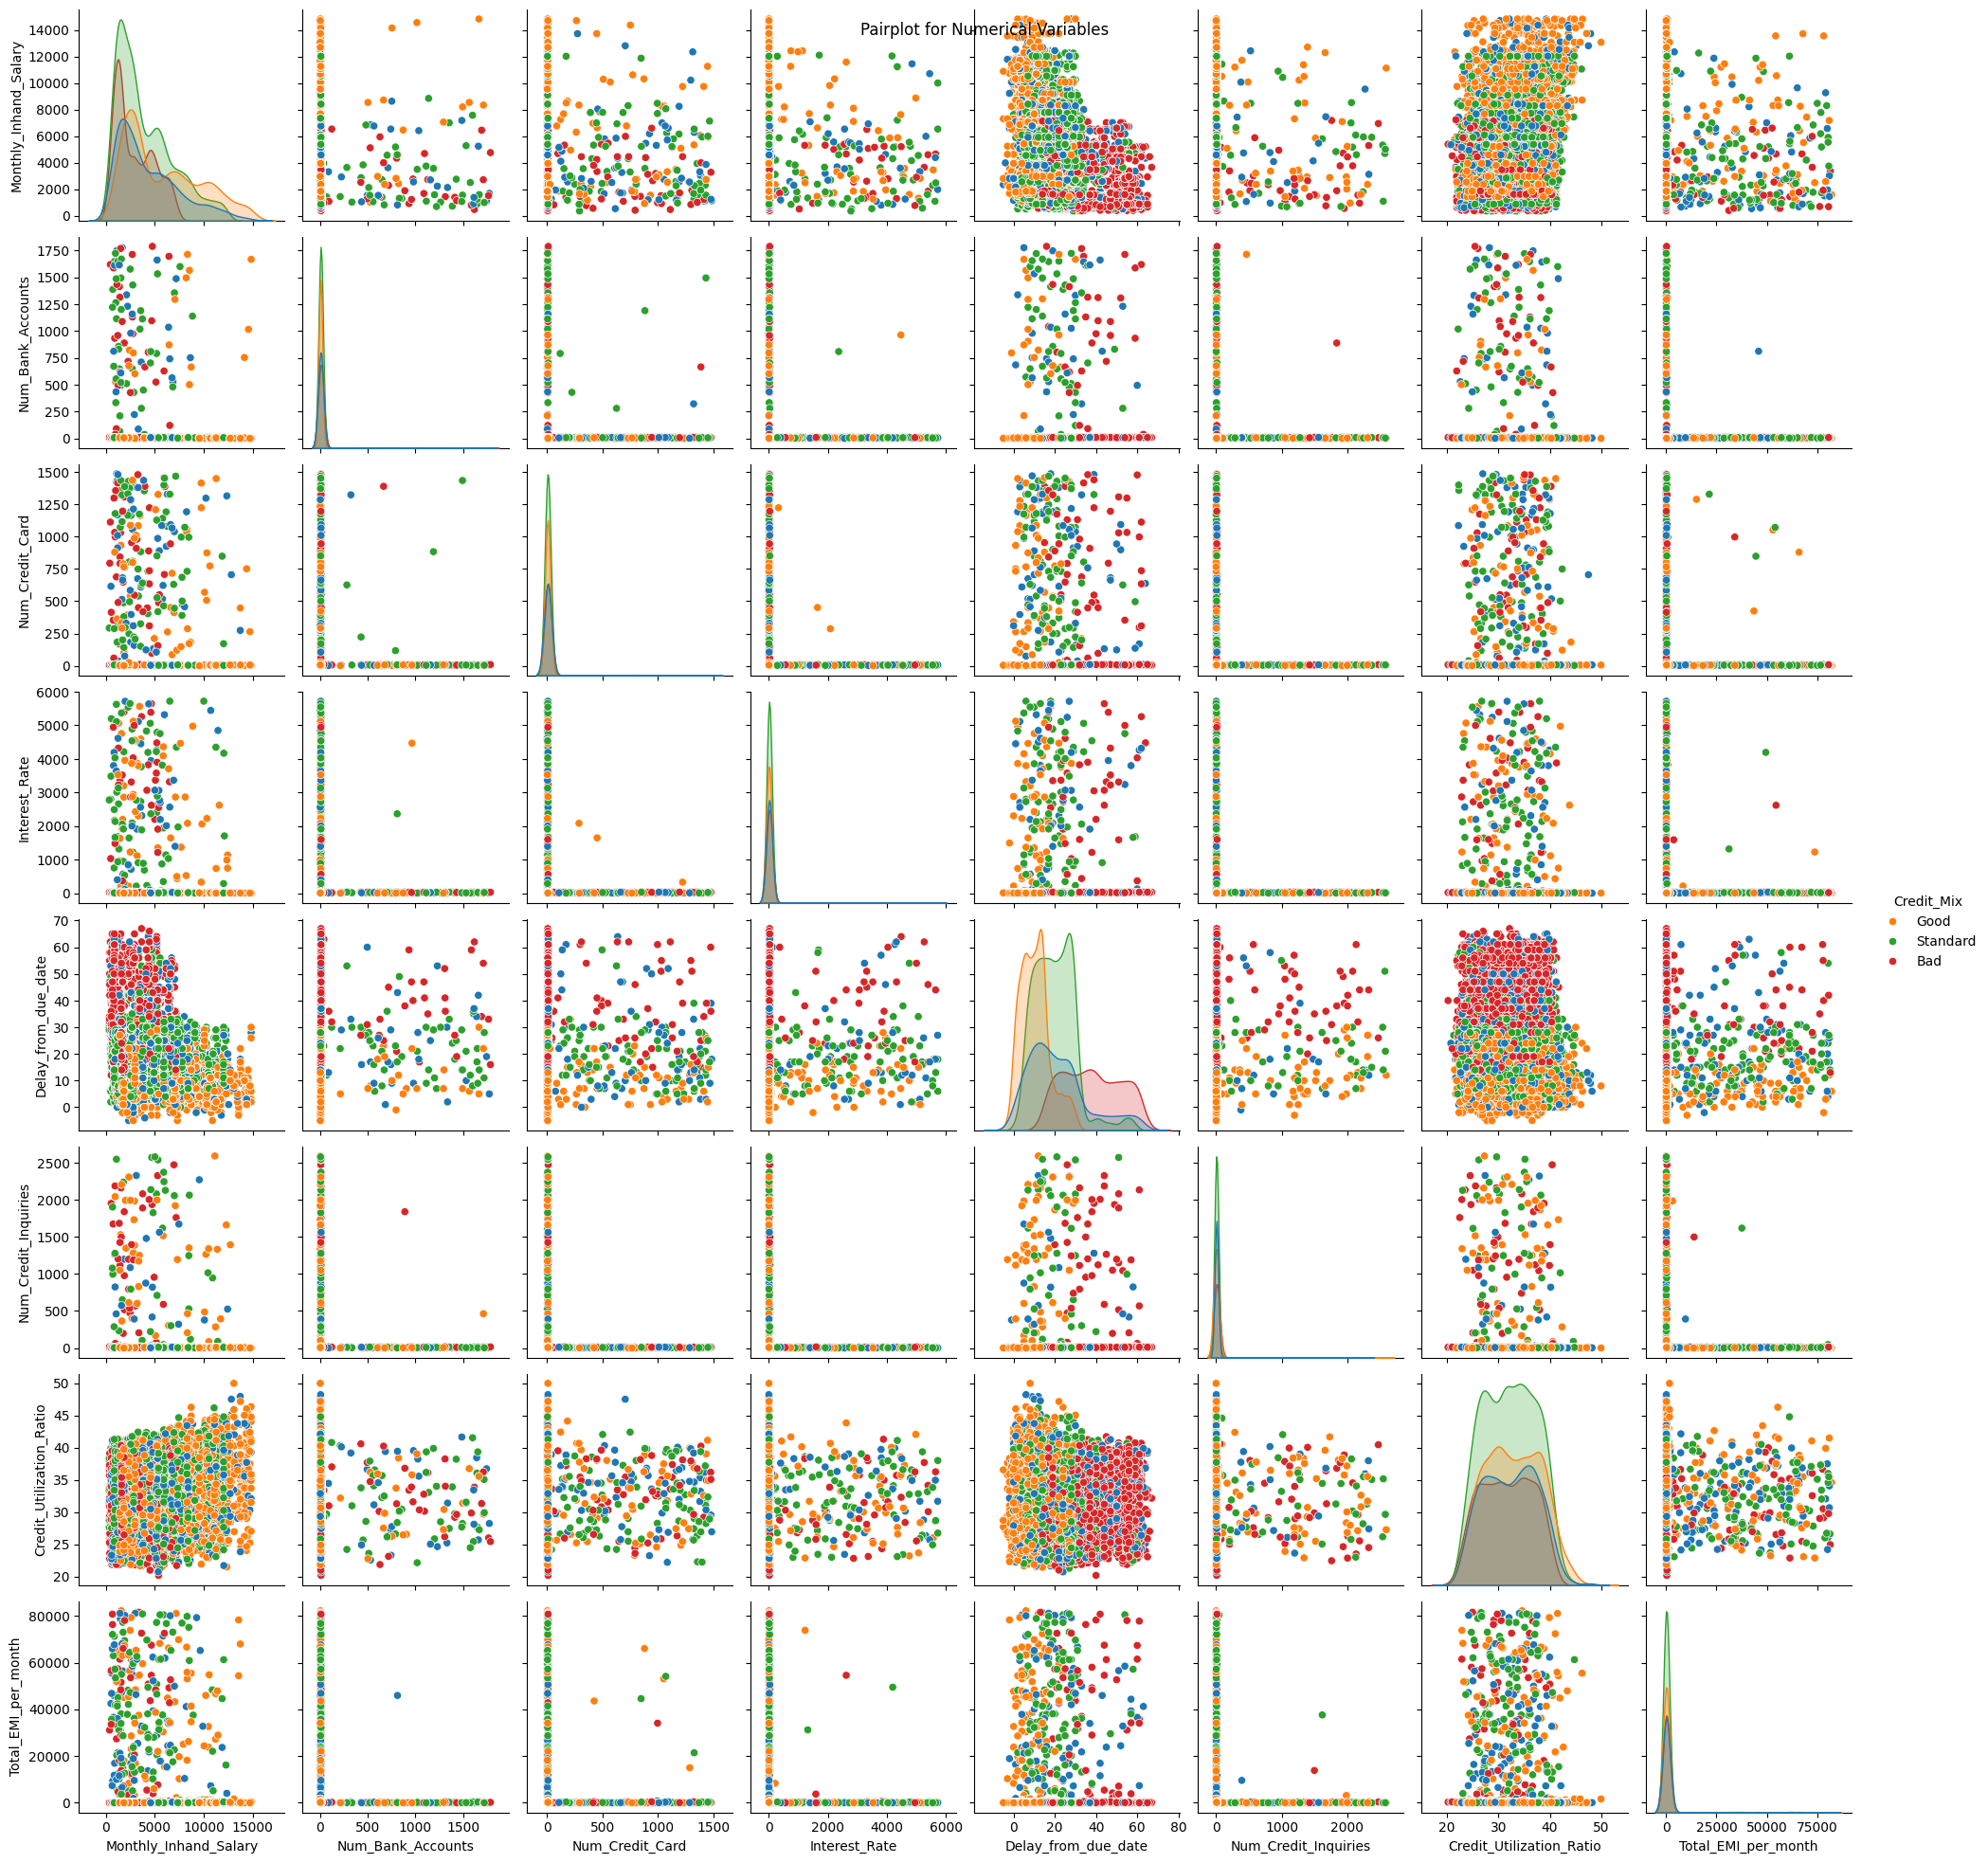

In [22]:
# Pairplot for exploring relationships between numerical variables
sns.pairplot(creditscore, hue='Credit_Mix')
plt.suptitle('Pairplot for Numerical Variables')
plt.show()

# Interpretation: Pairplots allow us to examine relationships between multiple numerical variables and detect patterns or clusters based on species.

In [23]:
print("\nCorrelation Matrix:\n")
# Select only numerical columns for correlation analysis
numerical_columns = creditscore.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
print(corr_matrix)

# Interpretation: This helps identify relationships between numerical variables.


Correlation Matrix:

                          Monthly_Inhand_Salary  Num_Bank_Accounts  \
Monthly_Inhand_Salary                  1.000000          -0.027535   
Num_Bank_Accounts                     -0.027535           1.000000   
Num_Credit_Card                       -0.010870           0.014627   
Interest_Rate                         -0.013756          -0.001055   
Delay_from_due_date                   -0.286205           0.032075   
Num_Credit_Inquiries                  -0.003386           0.001351   
Credit_Utilization_Ratio               0.170563          -0.011786   
Total_EMI_per_month                   -0.000650          -0.012259   

                          Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
Monthly_Inhand_Salary           -0.010870      -0.013756            -0.286205   
Num_Bank_Accounts                0.014627      -0.001055             0.032075   
Num_Credit_Card                  1.000000      -0.014557             0.003685   
Interest_Rate          

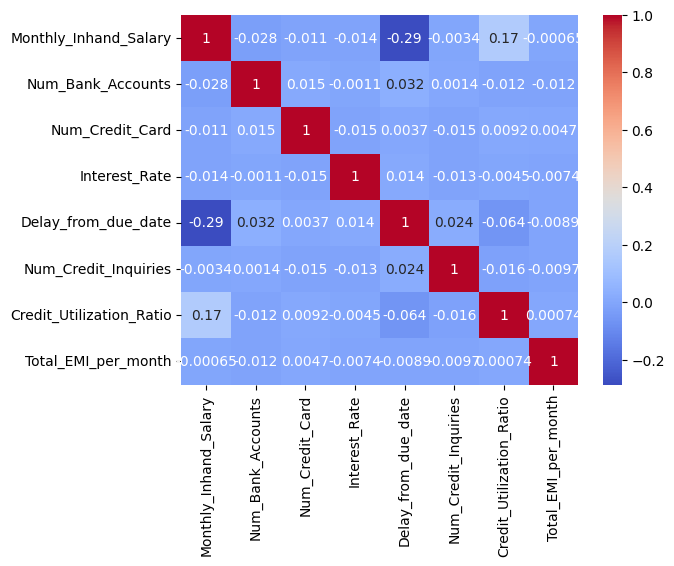

In [24]:
# Correlation heatmap for numerical columns
corr_matrix = creditscore.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Interpretation: The correlation heatmap helps identify relationships between numerical variables.
# Interpretation: The correlation matrix shows that most variables have low or near-zero correlations with each other. The only slightly notable correlations are the negative correlation between Monthly_Inhand_Salary and Delay_from_due_date (-0.26), and the positive correlation between Monthly_Inhand_Salary and Credit_Utilization_Ratio (0.16).


<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

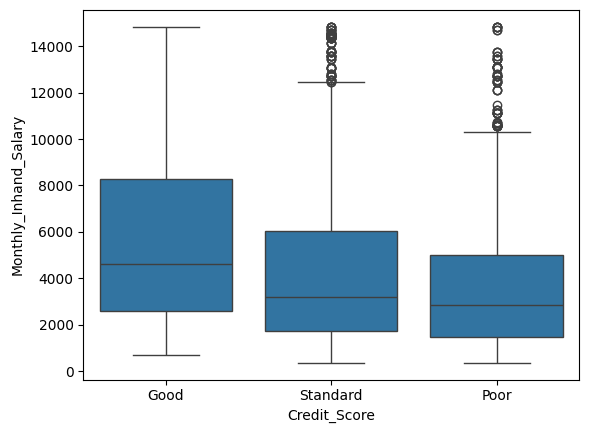

In [25]:
# The boxplot will show the Credit_Score distribution for Monthly_Inhand_Salary.
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=creditscore)

# Interpretation: There is a positive correlation between credit score and monthly income: higher credit scores are generally linked to higher incomes.
# Interpretation: The Good credit score group shows greater income variability but fewer outliers, suggesting a stable income range.
# Interpretation: The Standard and Poor groups have more high-income outliers, which may indicate exceptions or potential data anomalies.

<Axes: xlabel='Credit_Mix', ylabel='Delay_from_due_date'>

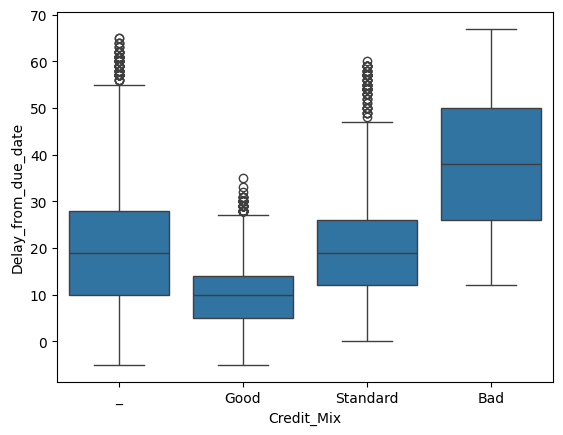

In [26]:
# The boxplot will show the age distribution for those who survived and those who didn't.
sns.boxplot(x='Credit_Mix', y='Delay_from_due_date', data=creditscore)

# Interpretation: People with better Credit_Mix will have fewer delay days.

<Axes: xlabel='Credit_Score', ylabel='Delay_from_due_date'>

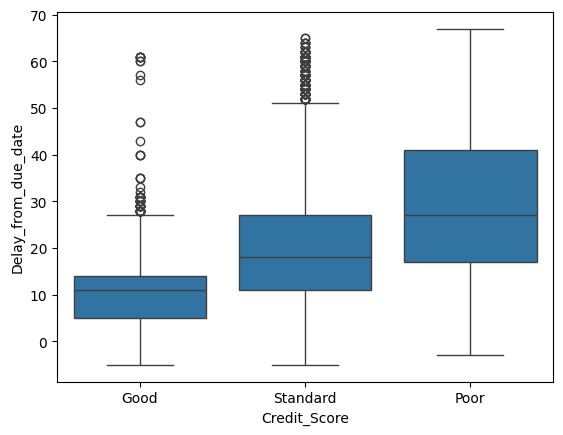

In [27]:
# The boxplot will show the age distribution for those who survived and those who didn't.
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=creditscore)

# Interpretation: People with better Credit_Score will have fewer delay days.

<Axes: xlabel='Credit_Mix', ylabel='Delay_from_due_date'>

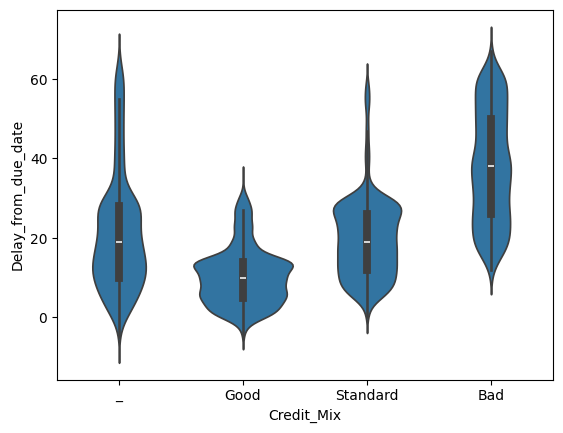

In [28]:
# The violin plot highlight the differences in age distribution among passengers in different classes.
sns.violinplot(x='Credit_Mix', y='Delay_from_due_date', data=creditscore)

# Interpretation: People with better Credit_Mix will have fewer delay days.

<Axes: xlabel='Credit_Score', ylabel='Interest_Rate'>

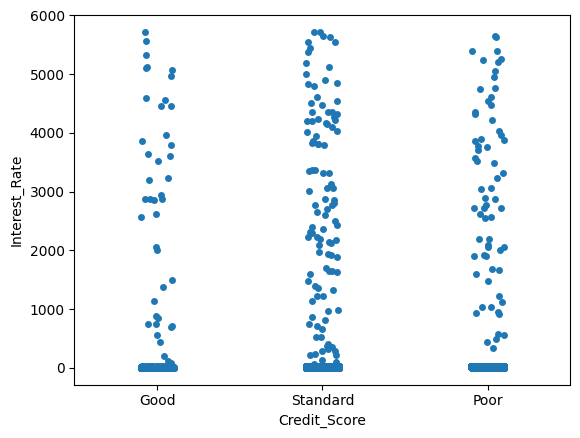

In [29]:
# The stripplot highlight the differences in fare distribution among passengers in different sex.
sns.stripplot(x='Credit_Score', y='Interest_Rate', data=creditscore, jitter=True)

# Interpretation: There is an inverse relationship between Credit_Score and Interest_Rate: higher credit scores (Good) tend to be associated with lower and less variable interest rates.

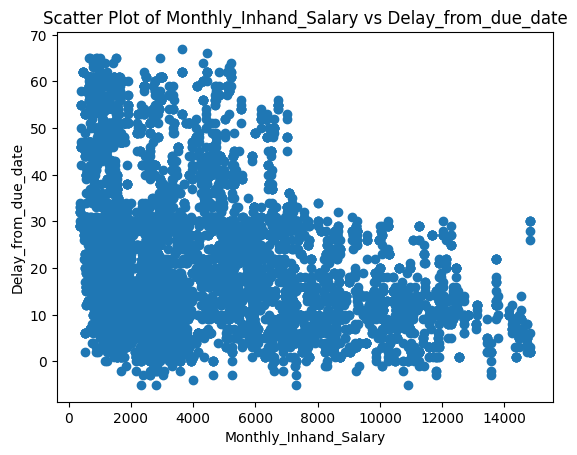

In [30]:
# Create a scatter plot
plt.scatter(creditscore['Monthly_Inhand_Salary'], creditscore['Delay_from_due_date'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Delay_from_due_date')
plt.title('Scatter Plot of Monthly_Inhand_Salary vs Delay_from_due_date')
plt.show()

# Interpretation: There is no distinct relation between Monthly_Inhand_Salary and Delay_from_due_date.

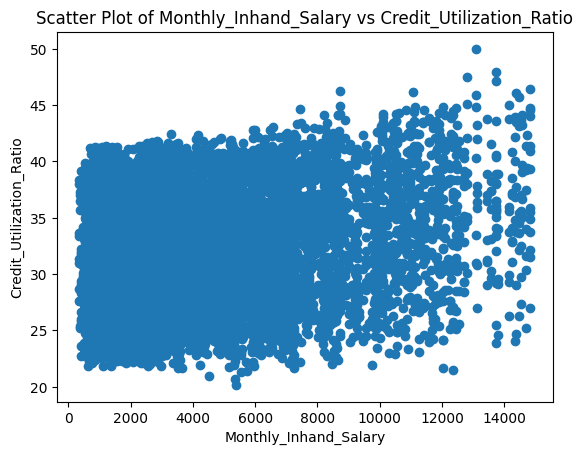

In [31]:
# Create a scatter plot
plt.scatter(creditscore['Monthly_Inhand_Salary'], creditscore['Credit_Utilization_Ratio'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Credit_Utilization_Ratio')
plt.title('Scatter Plot of Monthly_Inhand_Salary vs Credit_Utilization_Ratio')
plt.show()

# Interpretation: There is no distinct relation between Monthly_Inhand_Salary and Credit_Utilization_Ratio.

In [32]:
creditscore['Interest_Rate'] = pd.to_numeric(creditscore['Interest_Rate'], errors='coerce')
creditscore['Num_of_Delayed_Payment'] = pd.to_numeric(creditscore['Num_of_Delayed_Payment'], errors='coerce')
creditscore['Annual_Income'] = pd.to_numeric(creditscore['Annual_Income'], errors='coerce')
creditscore['Monthly_Balance'] = pd.to_numeric(creditscore['Monthly_Balance'], errors='coerce')

grouped_data = creditscore.groupby(['Credit_Score']).agg({
    'Interest_Rate': 'mean',
    'Delay_from_due_date': 'mean',
    'Annual_Income': 'mean',
    'Monthly_Balance': 'mean'
})

print(grouped_data)

# Interpretation: The Interest Rate increases significantly as the Credit Score declines from Good to Poor. This suggests that lower credit scores are associated with higher loan interest rates, likely due to the increased risk of default represented by a poor credit score.
# Interpretation: The Num_of_Delayed_Payment is noticeably higher in the Poor category, indicating that customers with lower credit scores tend to have more number of Delay_from_due_date.
# Interpretation: Both Annual Income and Monthly Balance are highest in the Good group and lowest in the Poor group. This implies that customers with better credit scores generally have higher incomes and more stable financial status.

              Interest_Rate  Delay_from_due_date  Annual_Income  \
Credit_Score                                                      
Good              69.896533            11.273600  211031.118188   
Poor              85.002999            29.356881  124514.286378   
Standard          69.298674            20.219508  199432.193685   

              Monthly_Balance  
Credit_Score                   
Good               496.900088  
Poor               347.126870  
Standard           411.926732  


##2. Data Cleaning


In [33]:
# Check for missing values in each column
creditscore.isnull().sum()

# Interpretation: This shows the number of missing values in each column, highlighting potential data quality issues that need to be addressed.

,0
ID,0
Customer_ID,0
Month,0
Name,1008
Age,0
SSN,0
Occupation,0
Annual_Income,722
Monthly_Inhand_Salary,1494
Num_Bank_Accounts,0


In [34]:
for column in creditscore.columns:
    if creditscore[column].dtype == 'object':
        creditscore[column] = creditscore[column].fillna(creditscore[column].mode()[0])
    else:
        creditscore[column] = creditscore[column].fillna(creditscore[column].median())

# Interpretation: Handle missing values. Fill the missing values ​​in the numeric field with the median and fill the category field with the mode.

In [35]:
# Check for missing values in each column
creditscore.isnull().sum()

# Interpretation: This shows the number of missing values in each column, highlighting potential data quality issues that need to be addressed.

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [36]:
creditscore['Credit_Score'] = creditscore['Credit_Score'].replace({'Good': 3, 'Standard': 2, 'Poor': 1})
print(creditscore['Credit_Score'].value_counts())

# Interpretation: Change the elements in Credit_Score into integer. Good = 3, Standard = 2, poor = 1.

Credit_Score
2    5281
1    3001
3    1875
Name: count, dtype: int64


<ipython-input-36-cf6e6bacaca3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  creditscore['Credit_Score'] = creditscore['Credit_Score'].replace({'Good': 3, 'Standard': 2, 'Poor': 1})


In [37]:
creditscore['Credit_Mix'] = creditscore['Credit_Mix'].replace({'Good': 3, 'Standard': 2, 'Poor': 1})
print(creditscore['Credit_Score'].value_counts())

# Interpretation: Change the elements in Credit_Score into integer. Good = 3, Standard = 2, poor = 1.

Credit_Score
2    5281
1    3001
3    1875
Name: count, dtype: int64


In [38]:
# Display the first 5 rows
creditscore.head()

# Interpretation: This gives a preview of the first few rows of the dataset, which helps verify that the data was loaded correctly.

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.494089,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3260.465000,3,...,3,809.98,31.944960,17 Years and 3 Months,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,3260.465000,3,...,3,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.209863,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3260.465000,3,...,3,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.451310,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,3,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.489231,3


In [39]:
from scipy import stats

# Calculate Z-scores for Age
creditscore['Age'] = creditscore['Age'].astype(str)
creditscore['Age'] = creditscore['Age'].str.replace(r'\D', '', regex=True)
creditscore['Age'] = creditscore['Age'].astype(int)
creditscore['z_score'] = stats.zscore(creditscore['Age'])

# Filter rows with Z-scores > 3 or < -3 (outliers)
tt_cleaned = creditscore[creditscore['z_score'].abs() < 3]
outliers = creditscore[creditscore['z_score'].abs() > 3]


# Interpretation: Z-scores help detect outliers by identifying values that are more than 3 standard deviations away from the mean.
# Interpretation: There are extreme values, particularly in the fare variable, that may distort average values and overall analysis.

In [40]:
tt_cleaned = tt_cleaned[(tt_cleaned['Age']>0) & (tt_cleaned['Age']<=100)]
tt_cleaned['Age'].unique()

# Interpretation: Set Age between 20-100

array([23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 56, 29, 49, 51, 50, 52])

In [41]:
# Remove outliers using the IQR method
Q1 = tt_cleaned[['Monthly_Inhand_Salary']].quantile(0.25)
Q3 = tt_cleaned[['Monthly_Inhand_Salary']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((tt_cleaned[['Monthly_Inhand_Salary']] < (Q1 - 1.5 * IQR)) |
                      (tt_cleaned[['Monthly_Inhand_Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = tt_cleaned[outlier_condition]
data_cleaned.head()

# Interpretation: There are higher Monthly_Inhand_Salary but in small numbers, outliers can be more effectively identified using the IQR method without being disturbed by extreme values.

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,z_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.494089,3,-0.149144
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3260.465000,3,...,809.98,31.944960,17 Years and 3 Months,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,3,-0.149144
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3260.465000,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.451310,3,-0.149144
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.489231,3,-0.149144
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3260.465000,3,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.479212,3,-0.149144


In [42]:
# Remove outliers using the IQR method
Q1 = data_cleaned[['Age']].quantile(0.25)
Q3 = data_cleaned[['Age']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((data_cleaned[['Age']] < (Q1 - 1.5 * IQR)) |
                      (data_cleaned[['Age']] > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data_cleaned[outlier_condition]
data_cleaned['Age'].unique()

# Interpretation: There are older people, outliers can be more effectively identified using the IQR method without being disturbed by extreme values.

array([23, 28, 34, 54, 55, 21, 31, 30, 24, 44, 45, 40, 41, 32, 33, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 56, 29, 49, 51, 50, 52])

In [43]:
# Remove outliers using the IQR method
data_cleaned['Delay_from_due_date'] = data_cleaned['Delay_from_due_date'].astype(str)
data_cleaned['Delay_from_due_date'] = data_cleaned['Delay_from_due_date'].str.replace(r'\D', '', regex=True)
data_cleaned['Delay_from_due_date'] = data_cleaned['Delay_from_due_date'].astype(int)
data_cleaned['z_score'] = stats.zscore(data_cleaned['Delay_from_due_date'])

Q1 = data_cleaned[['Delay_from_due_date']].quantile(0.25)
Q3 = data_cleaned[['Delay_from_due_date']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((data_cleaned[['Delay_from_due_date']] < (Q1 - 1.5 * IQR)) |
                      (data_cleaned[['Delay_from_due_date']] > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data_cleaned[outlier_condition]
data_cleaned['Delay_from_due_date'].unique()

# Interpretation: There are higher Delay_from_due_date but in small numbers, outliers can be more effectively identified using the IQR method without being disturbed by extreme values.

array([ 3,  1,  5,  6,  8,  7,  0,  4,  9, 10, 12, 11, 30, 31, 34, 27, 13,
       14,  2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26, 43, 28,
       25, 20, 47, 46, 49, 24, 29, 45, 55, 56, 54, 50, 36, 41, 33, 32, 39,
       44, 42, 35, 38, 40, 37])

In [44]:
# Remove outliers using the IQR method
data_cleaned['Num_of_Delayed_Payment'] = data_cleaned['Num_of_Delayed_Payment'].astype(int)
data_cleaned['z_score'] = stats.zscore(data_cleaned['Num_of_Delayed_Payment'])

Q1 = data_cleaned[['Num_of_Delayed_Payment']].quantile(0.25)
Q3 = data_cleaned[['Num_of_Delayed_Payment']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((data_cleaned['Num_of_Delayed_Payment'] < 0) |
                      (data_cleaned[['Num_of_Delayed_Payment']] < (Q1 - 1.5 * IQR)).any(axis=1) |
                      (data_cleaned[['Num_of_Delayed_Payment']] > (Q3 + 1.5 * IQR)).any(axis=1))
data_cleaned = data_cleaned[outlier_condition]
data_cleaned['Num_of_Delayed_Payment'].unique()

# Interpretation: There are higher Num_of_Delayed_Payment but in small numbers, outliers can be more effectively identified using the IQR method without being disturbed by extreme values.

array([ 7, 14,  4,  6,  1,  0,  3,  9, 12, 15, 17, 10,  2, 11,  8, 20, 22,
       13, 16, 18, 19, 23, 24, 21,  5, 26, 27, 25, 28])

In [45]:
columns_to_drop = ['ID','Customer_ID','Name','SSN','Month','Occupation']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, axis = 1)
data_cleaned.head()

# Interpretation: Drop unnecessory columns

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,z_score
0,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.494089,3,-0.106553
1,23,19114.12,3260.465000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,14,...,809.98,31.944960,17 Years and 3 Months,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,3,-0.071533
3,23,19114.12,3260.465000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.451310,3,-0.121561
4,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.489231,3,-0.071533
5,23,19114.12,3260.465000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.479212,3,-0.121561


In [46]:
# Display the data types
data_cleaned.dtypes

# Interpretation: Identify the name and type (continuous or categorical) for each variable in the dataset.

,0
Age,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Type_of_Loan,object
Delay_from_due_date,int64
Num_of_Delayed_Payment,int64


##3. Feature Engineering

In [47]:
print("\nCorrelation Matrix:\n")
# Select only numerical columns for correlation analysis
numerical_columns = data_cleaned.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
print(corr_matrix)

# Interpretation: This helps identify relationships between numerical variables.


Correlation Matrix:

                               Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000      -0.012394               0.055842   
Annual_Income            -0.012394       1.000000               0.008129   
Monthly_Inhand_Salary     0.055842       0.008129               1.000000   
Num_Bank_Accounts        -0.012883      -0.008280              -0.026118   
Num_Credit_Card           0.003878       0.032928              -0.007375   
Interest_Rate             0.010599       0.007042              -0.013869   
Delay_from_due_date      -0.211447      -0.002324              -0.193341   
Num_of_Delayed_Payment   -0.161118       0.013453              -0.174833   
Num_Credit_Inquiries     -0.009286      -0.008563              -0.003395   
Credit_Utilization_Ratio  0.011566       0.017530               0.111100   
Total_EMI_per_month       0.010568      -0.001060               0.003011   
Monthly_Balance           0.107923       0.004369               0.

In [48]:
data_cleaned['Monthly_Expense_Ratio'] = data_cleaned['Total_EMI_per_month'] / data_cleaned['Monthly_Inhand_Salary']

# Interpretation: Use Monthly Salary and Total Monthly EMI to create a monthly expense ratio, which can indicate the proportion of a person’s disposable income

In [49]:
data_cleaned['Monthly_Inhand_Salary_Delay_from_due_date'] = data_cleaned['Monthly_Inhand_Salary'] * data_cleaned['Delay_from_due_date']

# Interpretation: According to the correlation Matrix, Monthly_Inhand_Salary and Delay_from_due_date have slightly higher correlation. This feature may jointly affect credit score.

In [50]:
data_cleaned['Monthly_Inhand_Salary_Credit_Utilization_Ratio'] = data_cleaned['Monthly_Inhand_Salary'] * data_cleaned['Credit_Utilization_Ratio']

# Interpretation: According to the correlation Matrix, Monthly_Inhand_Salary and Credit_Utilization_Ratio have slightly higher correlation. This feature may jointly affect credit score.

In [51]:
data_cleaned['Delay_from_due_date_Num_of_Delayed_Payment'] = data_cleaned['Delay_from_due_date'] * data_cleaned['Num_of_Delayed_Payment']

# Interpretation: According to the correlation Matrix, Delay_from_due_date and Num_of_Delayed_Payment have high correlation. This feature may jointly affect credit score.

In [52]:
data_cleaned['Credit_Utilization_Level'] = pd.cut(
    creditscore['Credit_Utilization_Ratio'], bins=[0, 30, 70, 100], labels=['Low', 'Medium', 'High'], include_lowest=True
)
data_cleaned['Credit_Utilization_Level'].describe()

# Interpretation: Binning credit card utilization, lower utilization may indicate better credit profile

,Credit_Utilization_Level
count,8957
unique,2
top,Medium
freq,5617


In [53]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'z_score', 'Monthly_Expense_Ratio', 'Monthly_Inhand_Salary_Delay_from_due_date', 'Monthly_Inhand_Salary_Credit_Utilization_Ratio', 'Delay_from_due_date_Num_of_Delayed_Payment']
scaler = StandardScaler()
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])
data_cleaned.head()

# Interpretation: Standardizes specified numerical features

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,z_score,Monthly_Expense_Ratio,Monthly_Inhand_Salary_Delay_from_due_date,Monthly_Inhand_Salary_Credit_Utilization_Ratio,Delay_from_due_date_Num_of_Delayed_Payment,Credit_Utilization_Level
0,23,19114.12,-0.815929,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.353261,-1.109306,...,80.41529543900253,High_spent_Small_value_payments,312.494089,3,-1.109306,-0.118779,-1.084826,-0.877462,-1.065540,Low
1,23,19114.12,-0.236196,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.508871,0.093086,...,118.28022162236736,Low_spent_Large_value_payments,284.629162,3,0.093086,-0.121258,-1.120788,-0.241715,-1.091308,Medium
3,23,19114.12,-0.236196,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.197651,-1.624616,...,199.4580743910713,Low_spent_Small_value_payments,223.451310,3,-1.624616,-0.121258,-0.908959,-0.263007,-1.069221,Medium
4,23,19114.12,-0.815929,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.119846,0.093086,...,41.420153086217326,High_spent_Medium_value_payments,341.489231,3,0.093086,-0.118779,-0.995908,-0.920021,-0.833633,Low
5,23,19114.12,-0.236196,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-0.964236,-1.624616,...,62.430172331195294,!@9#%8,340.479212,3,-1.624616,-0.121258,-0.750087,-0.417530,-1.025049,Low


In [54]:
print("\nCorrelation Matrix:\n")
# Select only numerical columns for correlation analysis
numerical_columns = data_cleaned.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
print(corr_matrix)

# Interpretation: This helps identify relationships between numerical variables, and highlights multicollinearity.
# Interpretation: Monthly_Inhand_Salary_Credit_Utilization_Ratio and Monthly_Balance are high correlation.


Correlation Matrix:

                                                     Age  Annual_Income  \
Age                                             1.000000      -0.012394   
Annual_Income                                  -0.012394       1.000000   
Monthly_Inhand_Salary                           0.055842       0.008129   
Num_Bank_Accounts                              -0.012883      -0.008280   
Num_Credit_Card                                 0.003878       0.032928   
Interest_Rate                                   0.010599       0.007042   
Delay_from_due_date                            -0.211447      -0.002324   
Num_of_Delayed_Payment                         -0.161118       0.013453   
Num_Credit_Inquiries                           -0.009286      -0.008563   
Credit_Utilization_Ratio                        0.011566       0.017530   
Total_EMI_per_month                             0.010568      -0.001060   
Monthly_Balance                                 0.107923       0.004369   
Cre

In [55]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_creditscore.csv', index=False)

# Interpretation: This saves the cleaned dataset, ensuring that the modifications, such as imputed missing values and removed outliers, are preserved.

## 4. Report Preparation

In this data processing and feature engineering process, my main goal was to create a clean, reliable, and information-rich dataset for subsequent model training and prediction. To achieve this, I conducted data cleaning, missing value handling, feature engineering, and data standardization, all of which enhance the model's learning effectiveness and improve its ability to predict credit scores. My cleaning process addressed missing and outliers to ensure data consistency and completeness, preventing the model from being biased due to data defects.

In terms of feature engineering, new features like "Monthly Expense Ratio" and "Credit Utilization Level" provided additional financial pressure and behavioral insights, helping the model identify high-risk users more effectively. To ensure the model can accurately interpret categorical data, I transformed key categorical variables into numerical formats where necessary. Additionally, standardizing numerical features enabled all features to perform on a similar scale, positively impacting model convergence and prediction stability.

#Milestone 2: Model Development Report

##1. Model Selection

Objective:
- My goal is to predict credit scores, which is a classification problem.
- The credit scores are categorized into three classes (1: Poor, 2: Standard, 3: Good).

Approach:
- I will experiment with multiple machine learning models:
  1. Random Forest
  2. k-Nearest Neighbors (k-NN)
  4. Naive Bayes
  5. Decision Tree

Goal:
- Compare the performance of these models and select the best one for my dataset.

**Random Forest**

Suitability:
- Handles mixed data types well and captures non-linear relationships in the data.
- Built-in feature importance analysis helps identify key drivers of credit scores.
- Tolerant to outliers and imbalanced datasets with class weights adjustment.

Strengths:
- Robust and less prone to overfitting.
- Provides high accuracy with moderate dataset sizes.

Weaknesses:
- Slower training and inference on large datasets.

Use Case:
- Suitable if interpretability and stable accuracy are priorities.

**Artificial Neural Network (ANN)**

Suitability:
- Excels at capturing complex, non-linear relationships in high-dimensional data.
- Regularization techniques (e.g., dropout, early stopping) reduce overfitting.

Strengths:
- Outstanding performance with sufficient data volume.
- Automatically extracts deep features.

Weaknesses:
- Higher training cost (time and resources).
- Low interpretability.

Use Case:
- Ideal for large datasets with significant computational resources.
- Can potentially achieve higher accuracy compared to Random Forest.

**k-Nearest Neighbors (k-NN)**

Suitability:
- Works well with smaller datasets where relationships between features are not too complex.
- Requires standardized data for optimal performance.

Strengths:
- Simple and intuitive to implement.
- Non-parametric, making no assumptions about the data distribution.

Weaknesses:
- Computationally expensive for large datasets.
- Sensitive to the choice of k (number of neighbors) and outliers.

Use Case:
- Best for datasets with clear clusters and when computational cost is not a limitation.

**Naive Bayes**

Suitability:
- Suitable for categorical data and works well when features are conditionally independent.

Strengths:
- Fast to train and predict, even with large datasets.
- Performs well on small datasets.

Weaknesses:
- Assumes feature independence, which may not hold true for real-world data.
- Struggles with complex relationships between features.

Use Case:
- Good for quick baseline models or datasets with strong independence between features.

**Decision Tree**

Suitability:
- Easily interpretable and captures non-linear relationships in data.

Strengths:
- Simple to understand and visualize.
- Can handle both numerical and categorical data effectively.

Weaknesses:
- Prone to overfitting, especially on small datasets or datasets with noise.
- Less robust compared to ensemble methods like Random Forest.

Use Case:
- Ideal for interpretable models, especially for small to medium-sized datasets.


In [56]:
# Load the dataset
cleaned = pd.read_csv('cleaned_creditscore.csv')
# Interpretation: This loads the dataset into a DataFrame for exploration and analysis.

In [57]:
# Display column names
cleaned.columns

# Interpretation: This lists the column names, ensuring we know which variables we're working with.

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'z_score', 'Monthly_Expense_Ratio',
       'Monthly_Inhand_Salary_Delay_from_due_date',
       'Monthly_Inhand_Salary_Credit_Utilization_Ratio',
       'Delay_from_due_date_Num_of_Delayed_Payment',
       'Credit_Utilization_Level'],
      dtype='object')

In [58]:
cleaned.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,z_score,Monthly_Expense_Ratio,Monthly_Inhand_Salary_Delay_from_due_date,Monthly_Inhand_Salary_Credit_Utilization_Ratio,Delay_from_due_date_Num_of_Delayed_Payment,Credit_Utilization_Level
0,23,19114.12,-0.815929,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.353261,-1.109306,...,80.41529543900253,High_spent_Small_value_payments,312.494089,3,-1.109306,-0.118779,-1.084826,-0.877462,-1.065540,Low
1,23,19114.12,-0.236196,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.508871,0.093086,...,118.28022162236736,Low_spent_Large_value_payments,284.629162,3,0.093086,-0.121258,-1.120788,-0.241715,-1.091308,Medium
2,23,19114.12,-0.236196,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.197651,-1.624616,...,199.4580743910713,Low_spent_Small_value_payments,223.451310,3,-1.624616,-0.121258,-0.908959,-0.263007,-1.069221,Medium
3,23,19114.12,-0.815929,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.119846,0.093086,...,41.420153086217326,High_spent_Medium_value_payments,341.489231,3,0.093086,-0.118779,-0.995908,-0.920021,-0.833633,Low
4,23,19114.12,-0.236196,-0.117889,-0.146284,-0.150331,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-0.964236,-1.624616,...,62.430172331195294,!@9#%8,340.479212,3,-1.624616,-0.121258,-0.750087,-0.417530,-1.025049,Low


In [59]:
cleaned.dtypes

,0
Age,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64
Num_Credit_Card,float64
Interest_Rate,float64
Num_of_Loan,object
Type_of_Loan,object
Delay_from_due_date,float64
Num_of_Delayed_Payment,float64


In [60]:
cleaned['Credit_Score'].value_counts(normalize=False)

,count
Credit_Score,
2,4745
1,2611
3,1601


##2. Model Training and Evaluation

In [61]:
# Choose the columns that have a higher correlation to Credit_Score
X = cleaned[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Monthly_Balance', 'z_score', 'Monthly_Inhand_Salary_Delay_from_due_date', 'Delay_from_due_date_Num_of_Delayed_Payment', 'Monthly_Inhand_Salary_Credit_Utilization_Ratio']]
y = cleaned['Credit_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)


In [62]:
from sklearn.model_selection import GridSearchCV

# Training Random Forests
param_grid = {'n_estimators': [56, 54, 53, 55, 57]}
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV to perform hyperparameter adjusting with cross-validation, and I use 'n_estimators' this hyperparameter.
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters from the grid search
print("Best n_estimators:", grid_search.best_params_['n_estimators'])

# Prediction
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluation
print("\nRandom Forests Classification Report:\n")
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

# Interpretation: The result shows the accuracy is 71%, and the best n_estimators is 53. It also shows a balanced performance across different classes, especially for Class 2.
# Interpretation: I implemented multiple times of cross-validation, and this set performs the best.

Best n_estimators: 53

Random Forests Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.62      0.68       533
           2       0.70      0.81      0.75       949
           3       0.67      0.55      0.60       310

    accuracy                           0.71      1792
   macro avg       0.71      0.66      0.68      1792
weighted avg       0.71      0.71      0.71      1792


Confusion Matrix:

[[332 190  11]
 [107 768  74]
 [  5 134 171]]


In [64]:
# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [40, 45, 50, 55, 60]}

# Use GridSearchCV to perform hyperparameter adjusting with cross-validation, and I use 'n_neighbors' this hyperparameter.
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best n_neighbors
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])

best_knn = grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test)
knn_report = classification_report(y_test, y_pred_knn)
print("\nk-NN Classification Report:\n", knn_report)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:\n', conf_matrix)

# Interpretation: The result shows the accuracy is 60%, and the best n_neighbors is 40. k-NN struggles with distinguishing Class 3.
# Interpretation: I implemented multiple times of cross-validation, and this set performs the best.

Best n_neighbors: 40

k-NN Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.40      0.49       533
           2       0.61      0.78      0.68       949
           3       0.50      0.41      0.45       310

    accuracy                           0.60      1792
   macro avg       0.58      0.53      0.54      1792
weighted avg       0.60      0.60      0.59      1792

Confusion Matrix:
 [[214 290  29]
 [117 736  96]
 [  8 176 126]]


In [65]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Validation
nb_report = classification_report(y_test, y_pred_nb)
print("\nNaive Bayes Classification Report:\n", nb_report)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:\n', conf_matrix)

# Interpretation: The result shows the accuracy is 55%. This is the lowest among 4 models.


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.45      0.51       533
           2       0.63      0.57      0.60       949
           3       0.38      0.65      0.48       310

    accuracy                           0.55      1792
   macro avg       0.53      0.56      0.53      1792
weighted avg       0.57      0.55      0.55      1792

Confusion Matrix:
 [[239 214  80]
 [163 539 247]
 [  9  98 203]]


In [67]:
# Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Validation
dt_report = classification_report(y_test, y_pred_dt)
print("\nDecision Tree Classification Report:\n", dt_report)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:\n', conf_matrix)

# Interpretation: The result shows the accuracy is 63%. It shows poor performance in predicting Class 3.


Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.59      0.61       533
           2       0.67      0.68      0.68       949
           3       0.51      0.55      0.53       310

    accuracy                           0.63      1792
   macro avg       0.61      0.61      0.61      1792
weighted avg       0.63      0.63      0.63      1792

Confusion Matrix:
 [[314 194  25]
 [165 645 139]
 [ 17 121 172]]


##3. Report Preparation

Given the evaluation of all models, Random Forest emerges as the best-performing model for this classification task. Random Forest has the highest accuracy (71%) among all the models, making it the most reliable classifier overall. Random Forest tends to be more stable due to its ensemble nature. It combines multiple decision trees to make predictions, which often results in improved generalization compared to a single Decision Tree or other models. Therfore, Random Forest is the most suitable model because it strikes a balance between accuracy and performance. I will use this model to predict Credit_Score.